# Analisis Kualitas Air - Kechau
Notebook ini berisi preprocessing, analisis, dan visualisasi data kualitas air untuk Sungai Kechau.

In [1]:
pip install pandas numpy matplotlib seaborn

You should consider upgrading via the 'c:\Users\annisa andriyani\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
# Path ke file CSV
file_path = "Kechau_Raw.csv"

# Baca file CSV dengan pemisah yang sesuai
df = pd.read_csv(file_path, sep=',')

# Menemukan nama kolom yang mengandung 'time'
time_col = [col for col in df.columns if 'time' in col.lower()][0]

# Bersihkan nama kolom dari karakter tersembunyi
df.columns = df.columns.str.replace(r'[\t\n]', '', regex=True)

# Ubah kolom waktu menjadi format datetime
df.rename(columns={time_col: 'Timestamp'}, inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Hapus kolom yang tidak diinginkan jika ada
columns_to_drop = ["COD_Sensor", "BOD_Sensor", "Unnamed: 10"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Tampilkan tabel data setelah pembersihan
display(df)



,Timestamp,Ph_Sensor,ORP_Sensor,CT_Sensor,TDS_Sensor,NH_Sensor,DO_Sensor,TR_Sensor
0,2024-10-07 12:08:14.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-07 12:38:14.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-07 13:08:14.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-07 13:38:14.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-07 14:08:14.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1062,2024-12-04 10:54:06.020,32.877,1.12,26.011,25.544,0.605,25.818,25.938
1063,2024-12-04 11:24:06.020,1.587,1.12,26.035,25.567,0.593,25.869,25.938
1064,2024-12-04 11:54:06.020,-7.305,1.12,26.045,25.567,0.552,25.872,25.938
1065,2024-12-04 12:24:06.020,-15.332,1.12,26.059,25.592,0.538,25.935,26.000


## Visualisasi Distribusi Data

C:\Users\annisa andriyani\AppData\Local\Temp\ipykernel_476\1979474252.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_count = df[numerical_cols].resample('M').count()


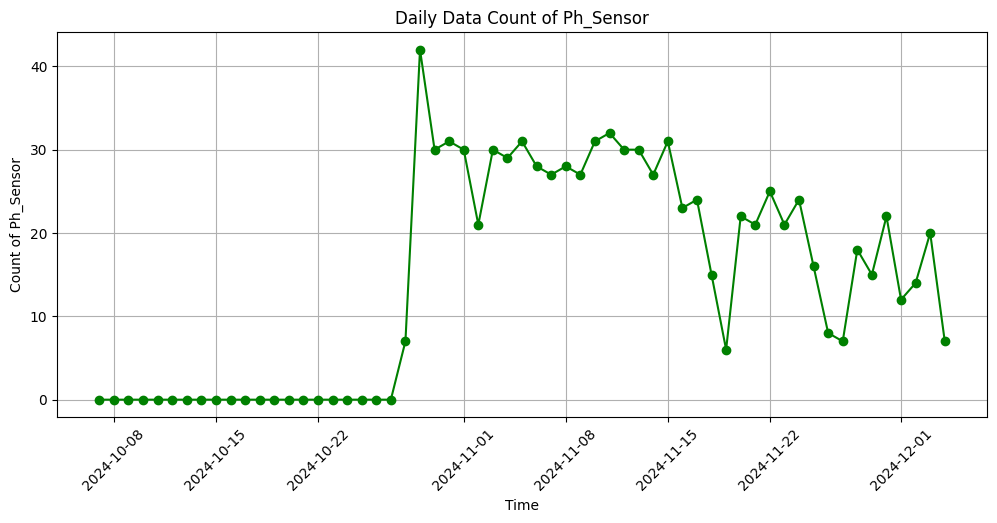

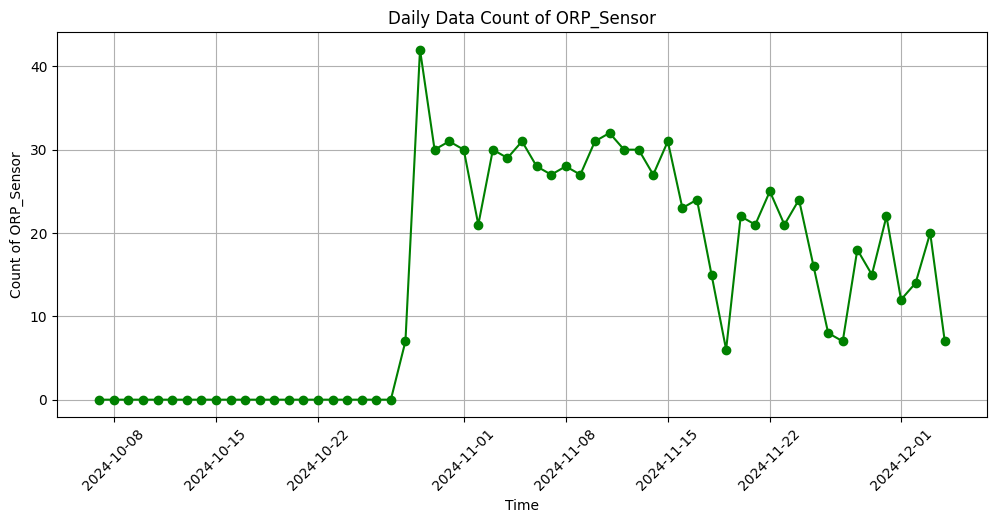

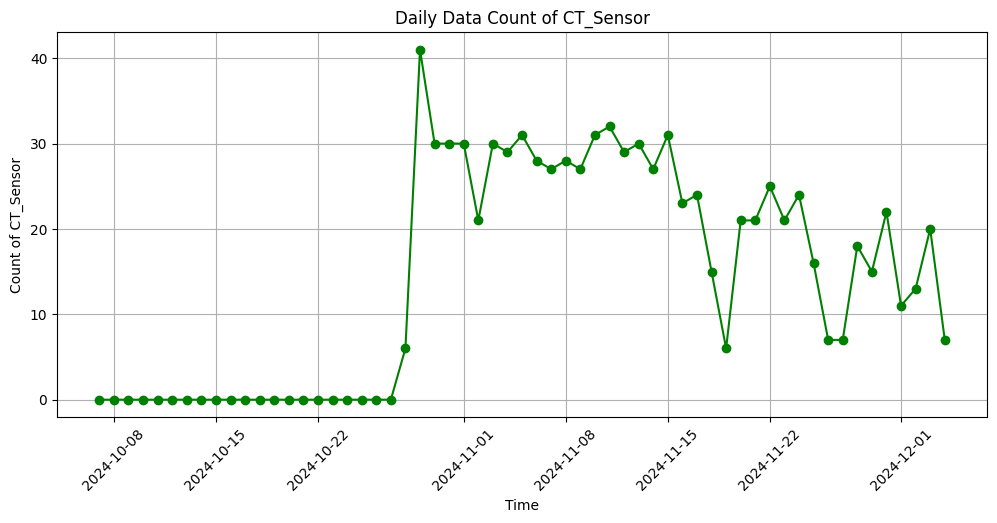

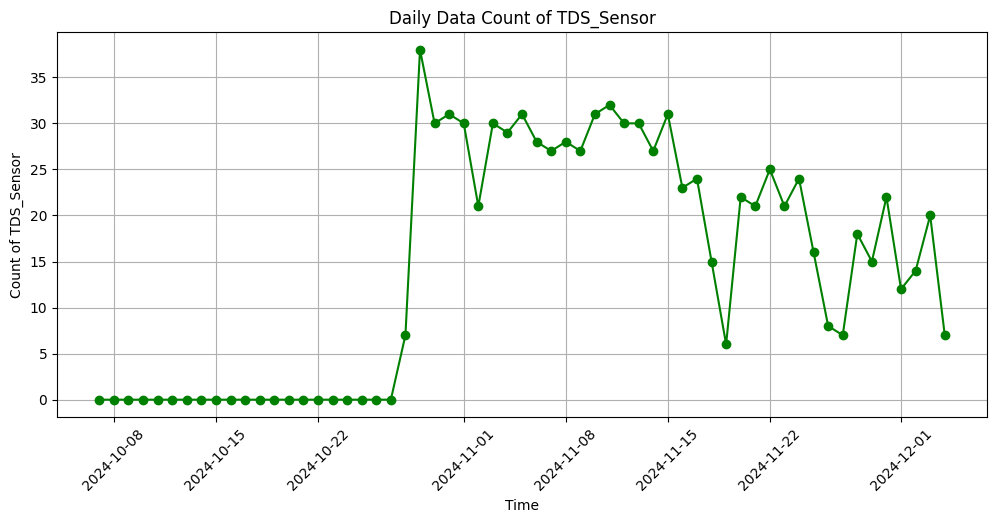

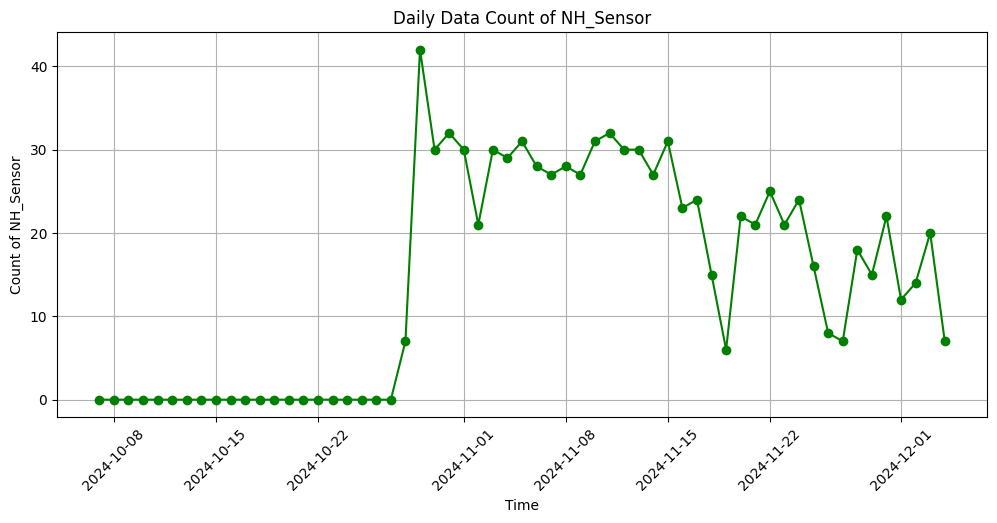

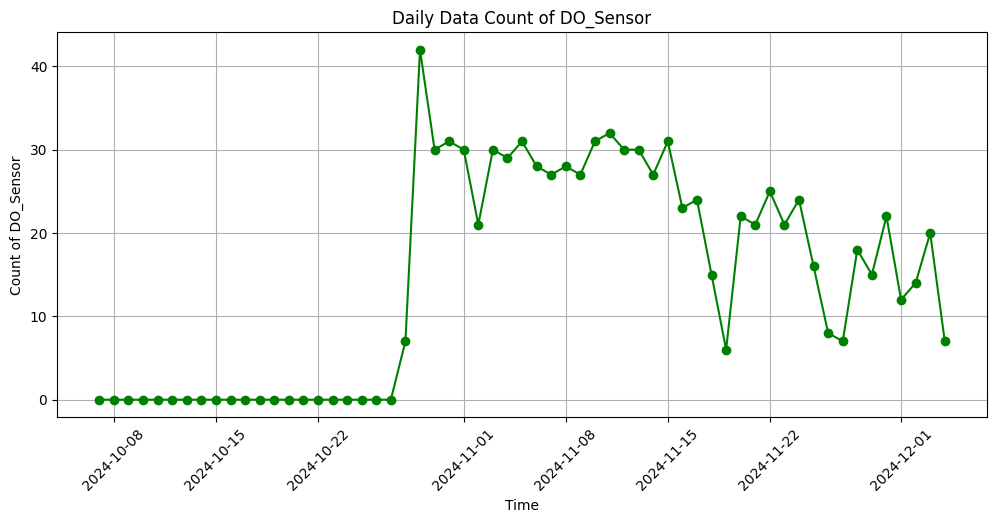

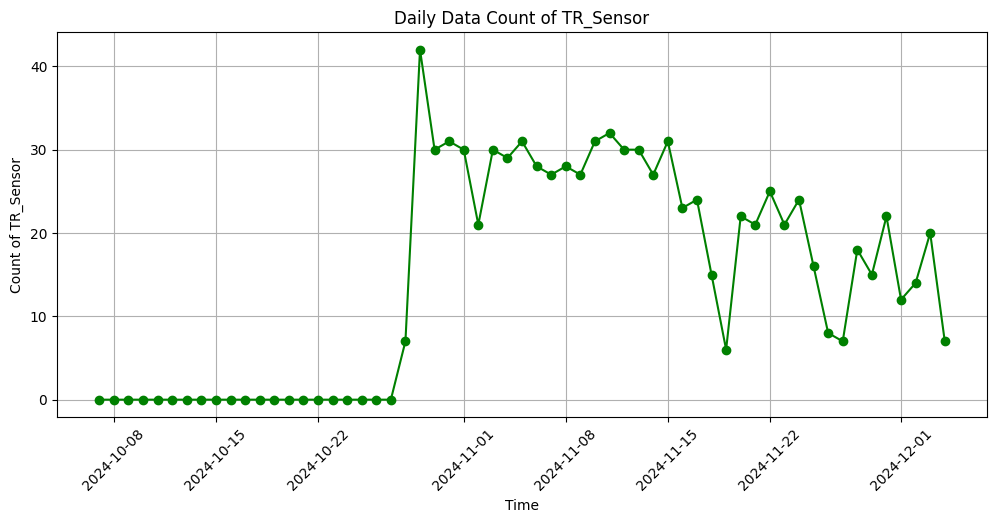

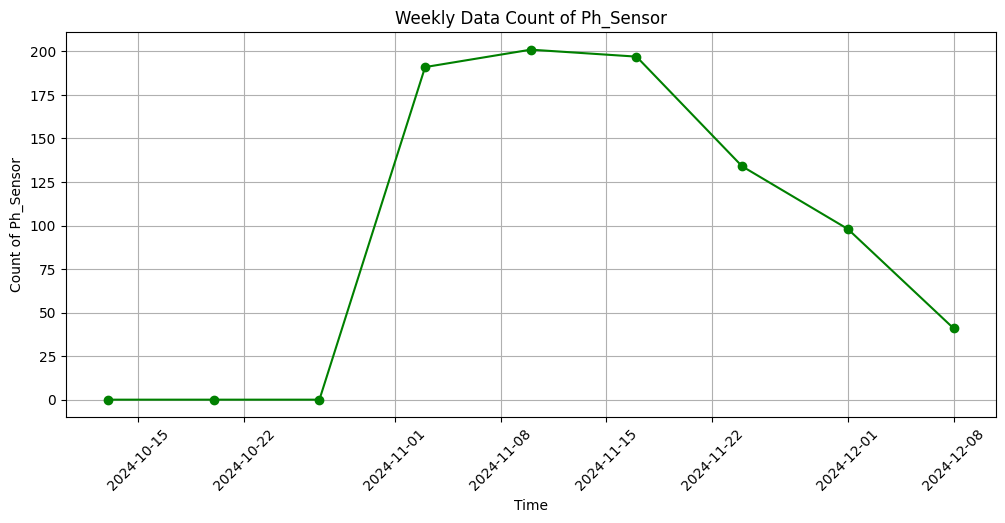

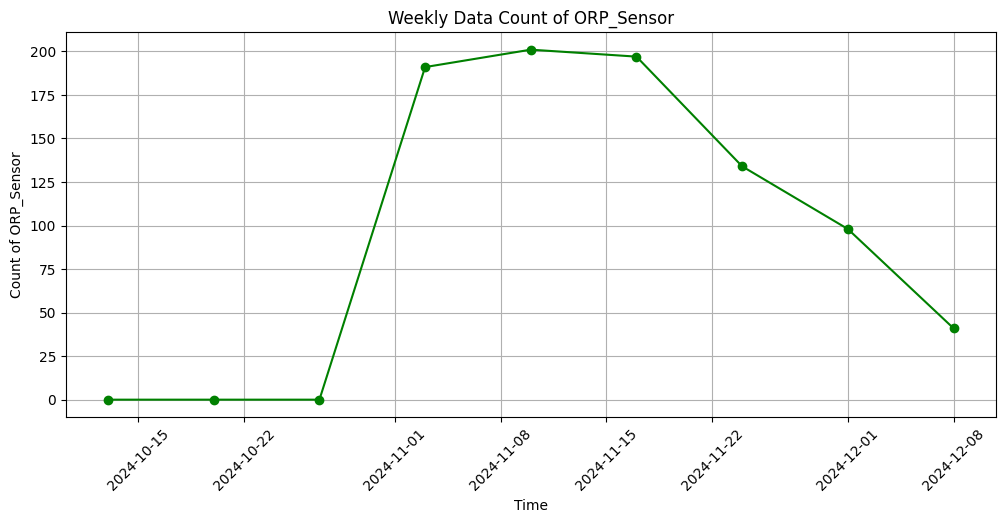

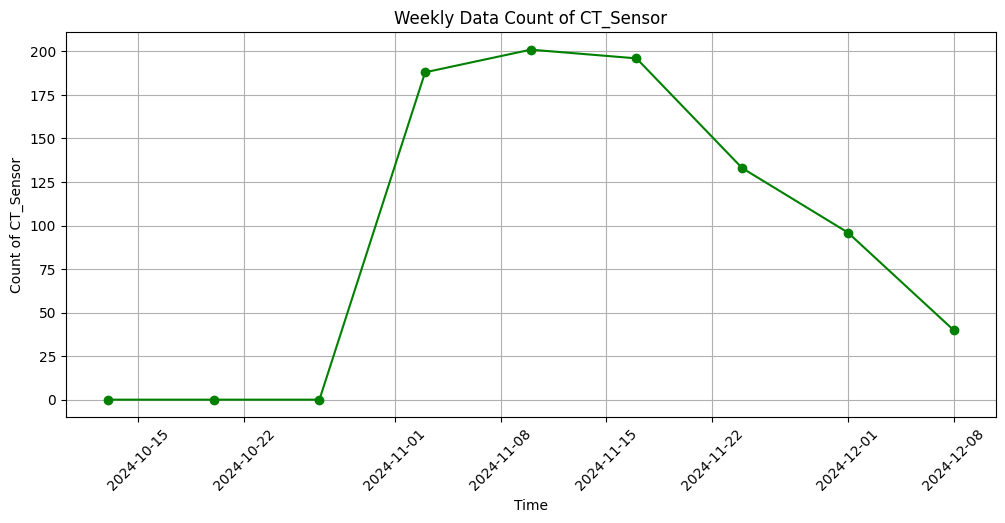

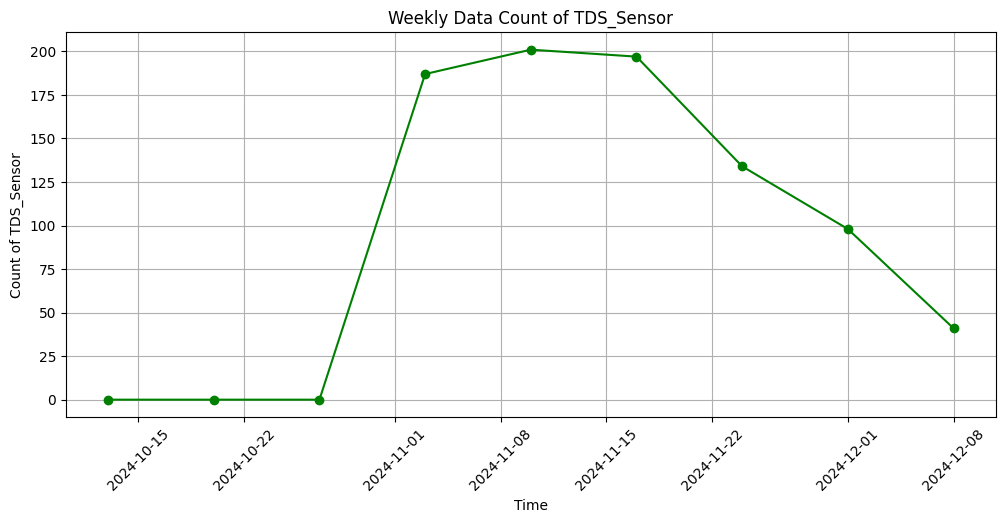

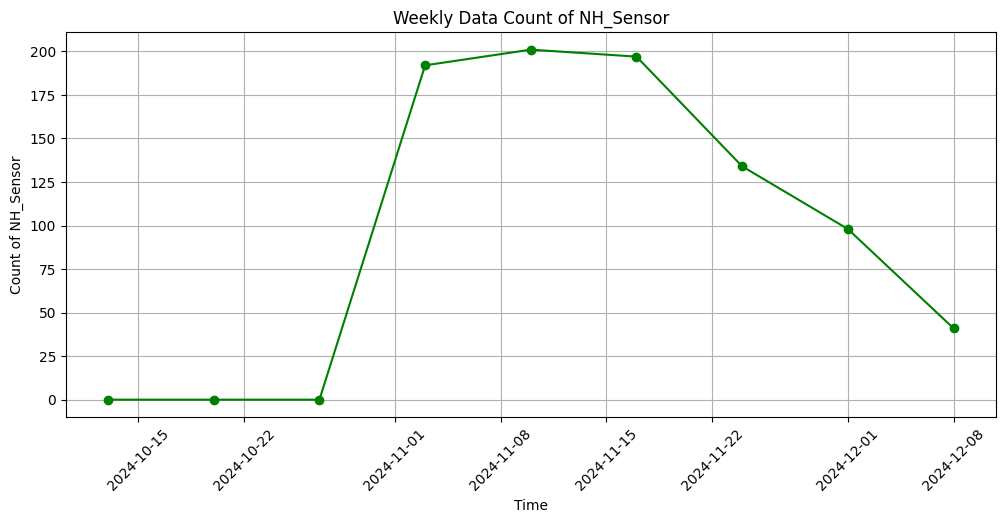

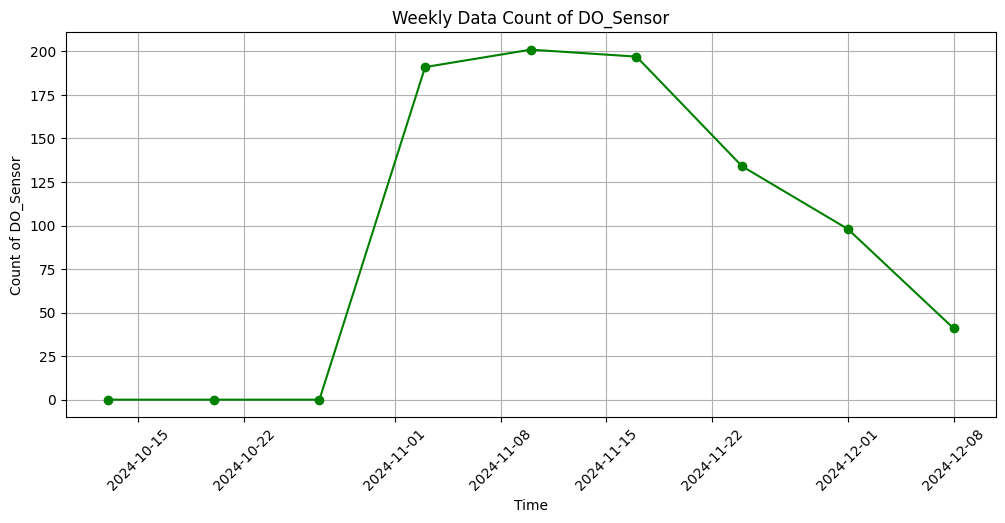

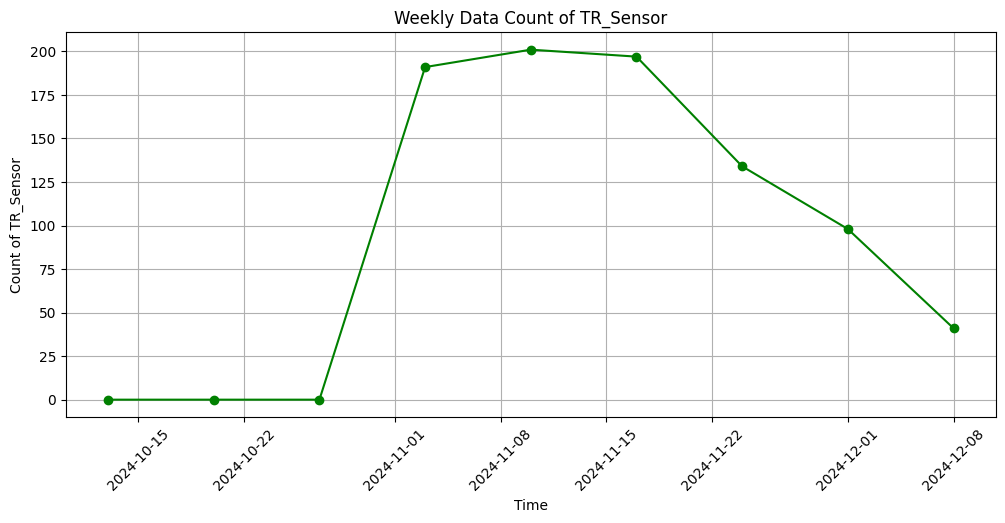

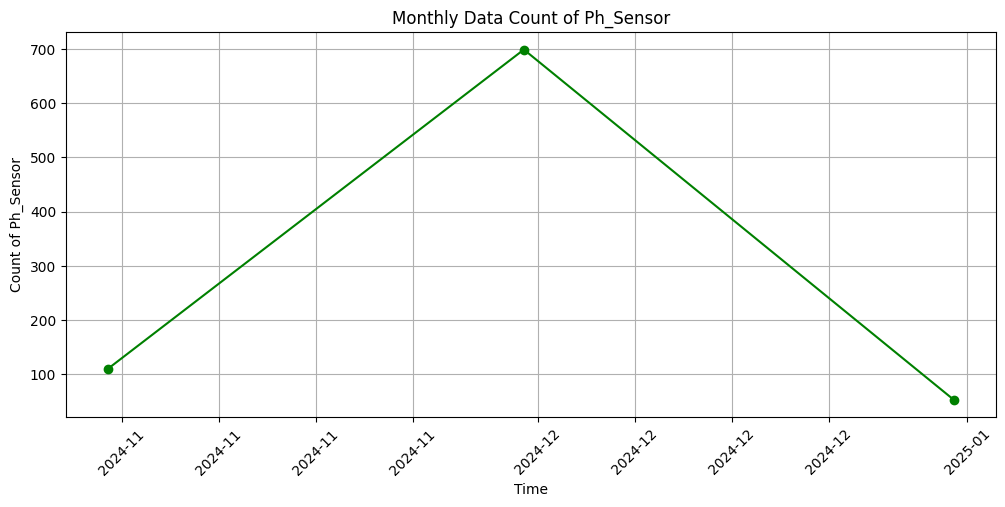

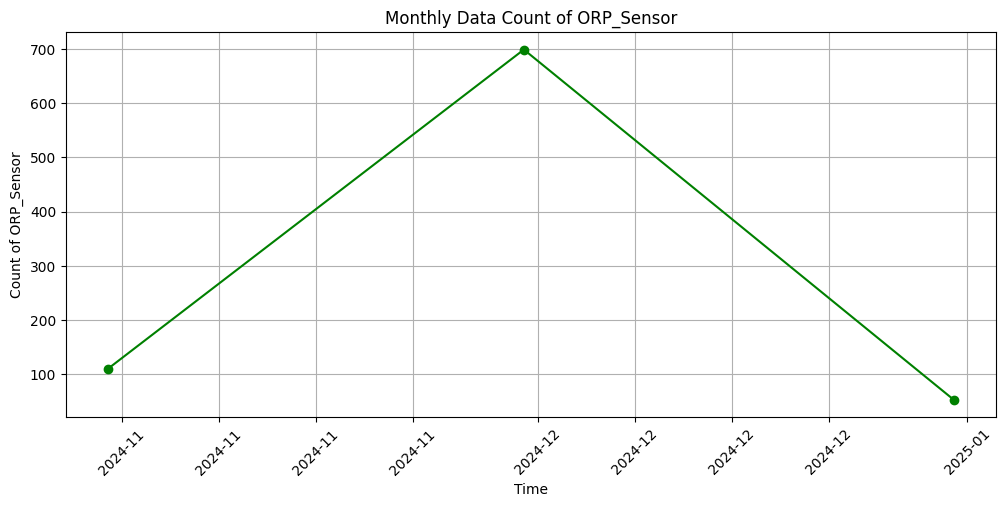

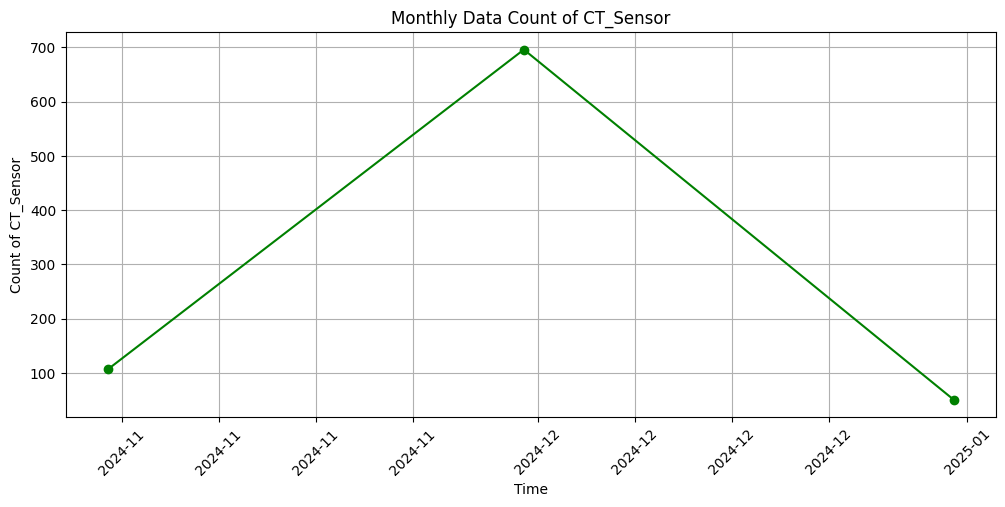

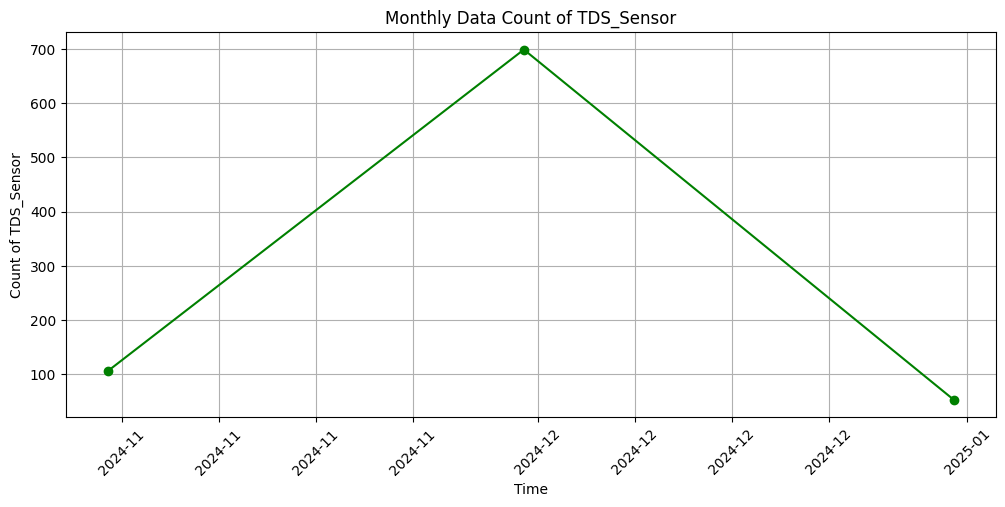

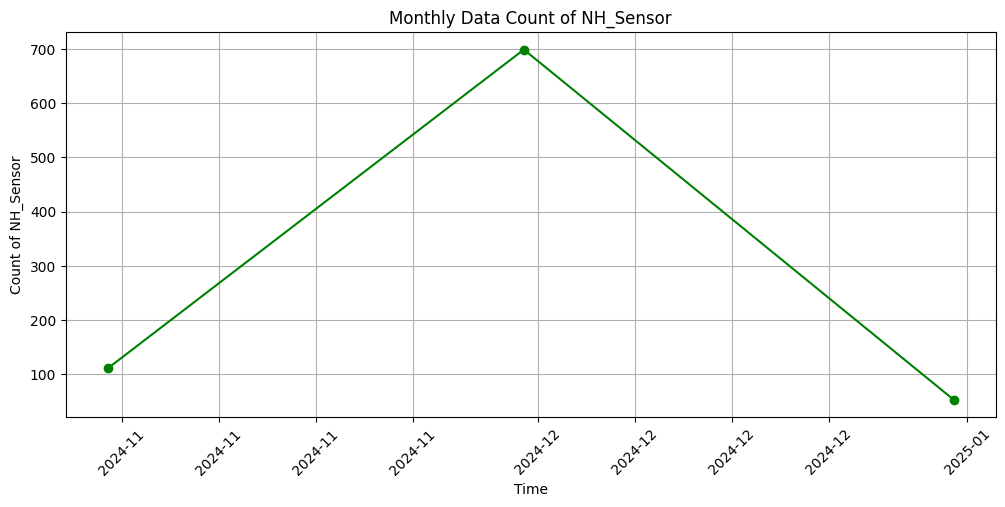

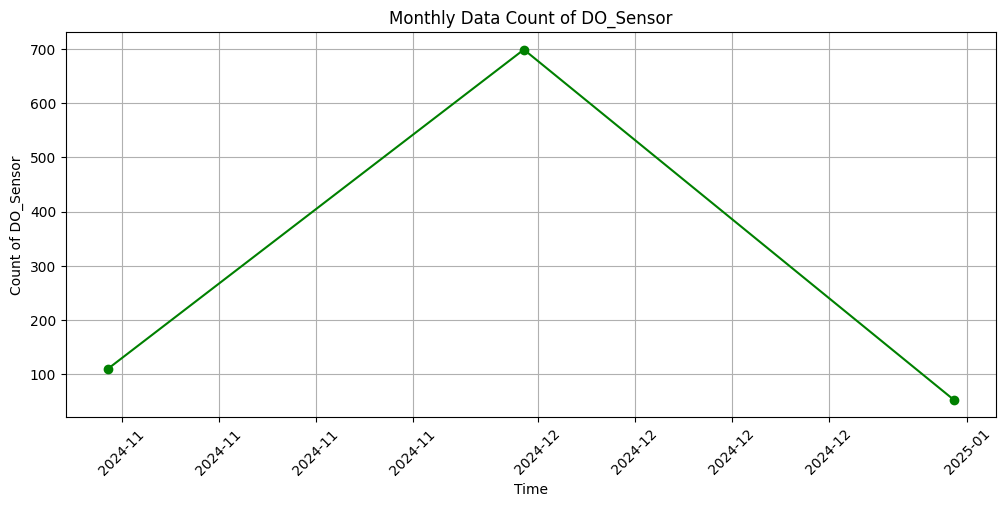

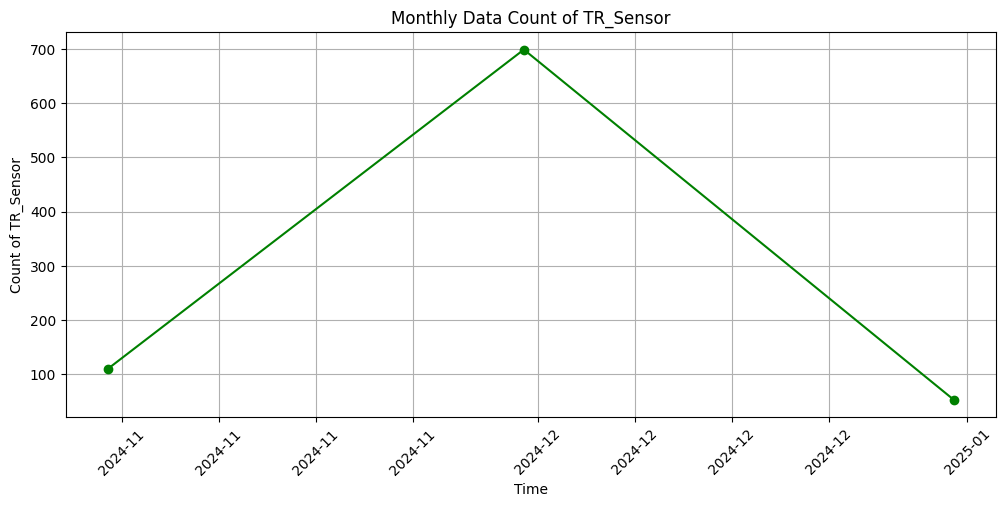

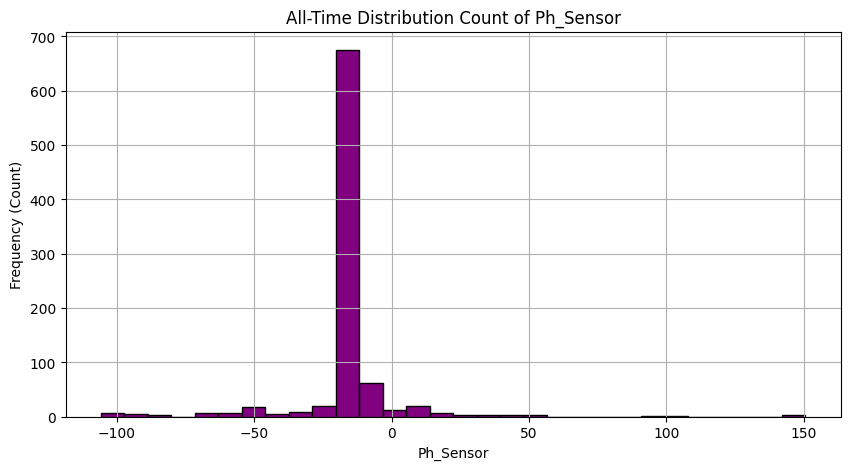

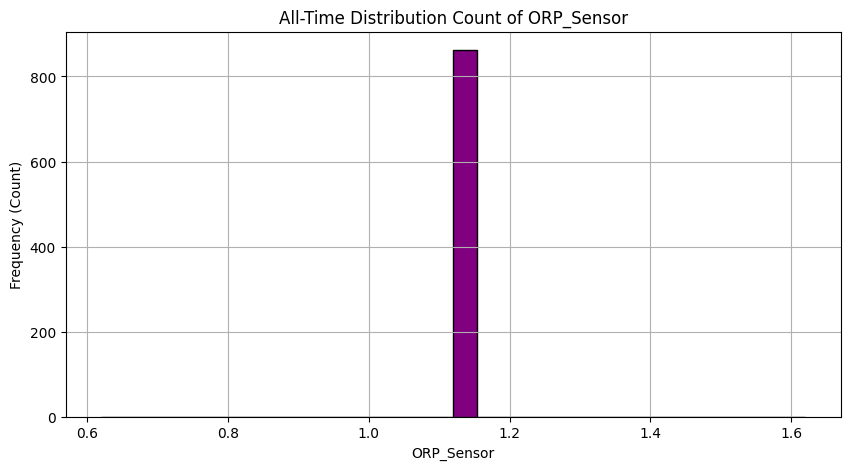

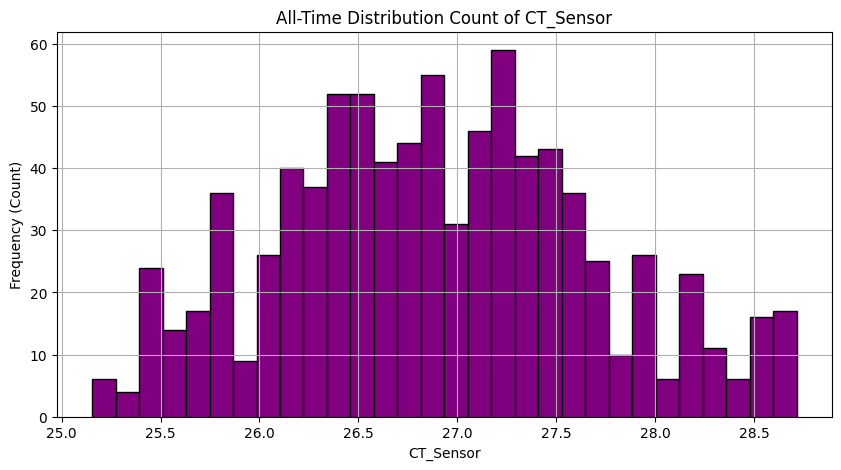

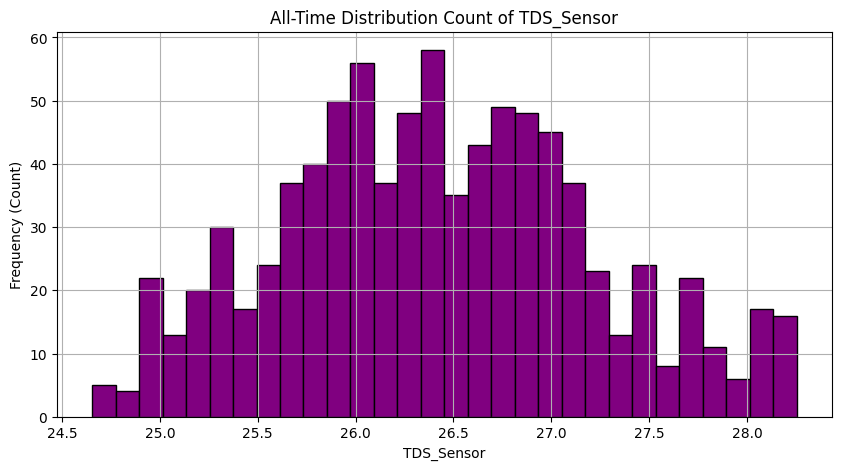

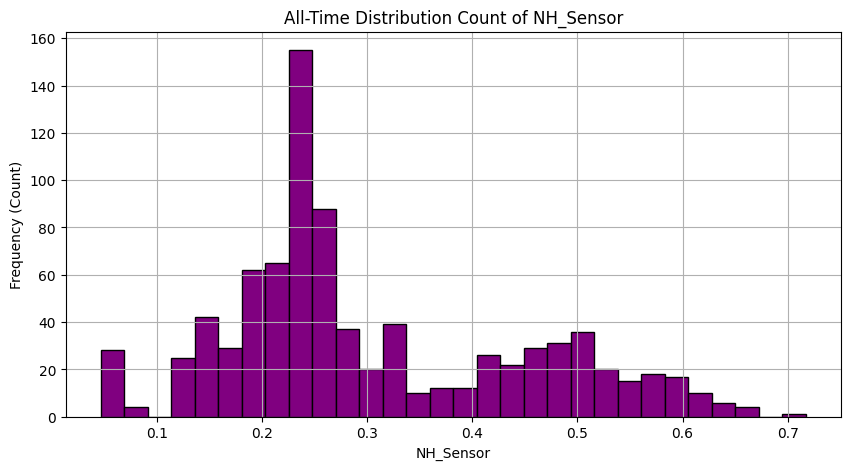

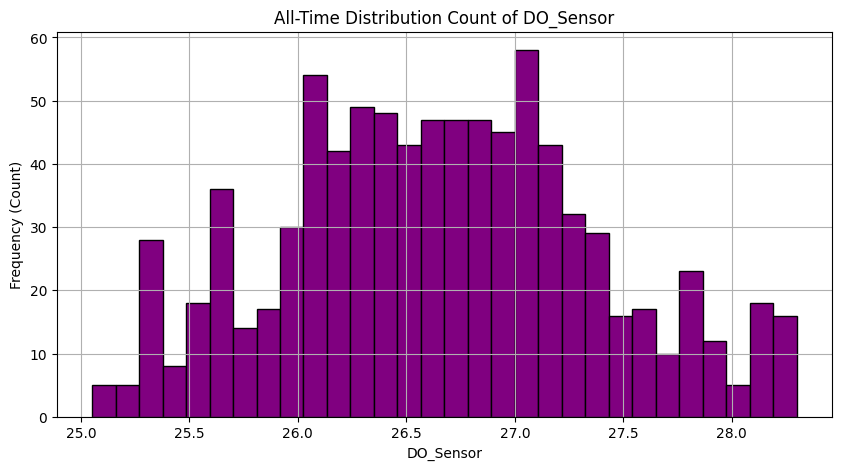

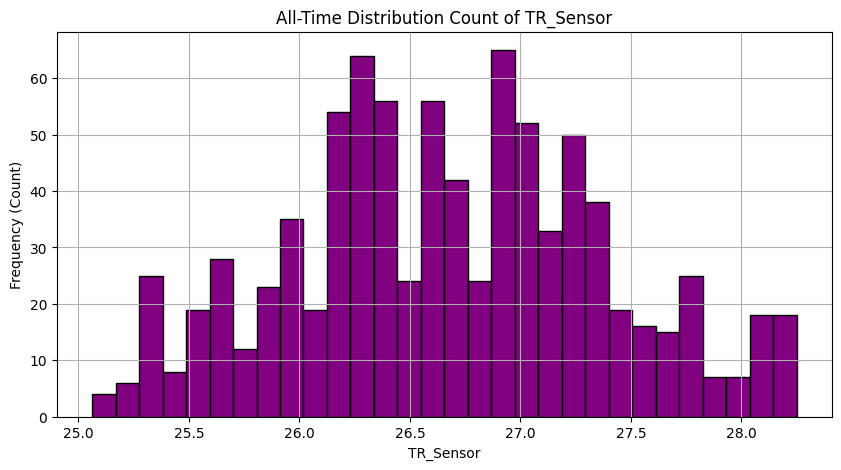

In [4]:
import matplotlib.dates as mdates
# Pilih hanya kolom numerik untuk visualisasi
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Buat pengelompokan daily, weekly, monthly berdasarkan count (jumlah data yang ada)
df.set_index('Timestamp', inplace=True)

df_daily_count = df[numerical_cols].resample('D').count()
df_weekly_count = df[numerical_cols].resample('W').count()
df_monthly_count = df[numerical_cols].resample('M').count()

# Fungsi untuk menampilkan jumlah data dengan sumbu x yang sesuai
def plot_data_count(grouped_df, title, time_format):
    for column in df.columns:
        plt.figure(figsize=(12, 5))
        plt.plot(grouped_df.index, grouped_df[column], marker='o', linestyle='-', color='g')
        plt.xlabel("Time")
        plt.ylabel(f"Count of {column}")
        plt.title(f"{title} Data Count of {column}")
        plt.xticks(rotation=45)
        
        # Atur format sumbu x berdasarkan skala
        ax = plt.gca()
        ax.xaxis.set_major_formatter(mdates.DateFormatter(time_format))  # Format tanggal
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Otomatis menyesuaikan jumlah label

        plt.grid()
        plt.show()

# Plot count untuk daily (format tanggal penuh)
plot_data_count(df_daily_count, "Daily", "%Y-%m-%d")

# Plot count untuk weekly (format minggu)
plot_data_count(df_weekly_count, "Weekly", "%Y-%m-%d")

# Plot count untuk monthly (format bulan dan tahun)
plot_data_count(df_monthly_count, "Monthly", "%Y-%m")

# Plot histogram untuk distribusi jumlah data dalam all-time
for column in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column].dropna(), bins=30, edgecolor='black', color='purple')
    plt.xlabel(column)
    plt.ylabel("Frequency (Count)")
    plt.title(f"All-Time Distribution Count of {column}")
    plt.grid()
    plt.show()

## Data Cleaning

In [7]:
# Hapus kolom yang tidak diinginkan jika ada
columns_to_drop = ["Ph_Sensor","DO_Sensor","TR_Sensor"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [11]:
# Definisi rentang nilai yang valid untuk setiap parameter
valid_ranges = {
   # "Ph_Sensor": (0, 14),  # Kisaran pH air
    "ORP_Sensor": (-1000, 1000),  # Oxidation-Reduction Potential dalam mV
    "CT_Sensor": (0, 2000),  # Conductivity dalam µS/cm (bisa lebih tinggi tergantung air)
    "TDS_Sensor": (0, 5000),  # Total Dissolved Solids dalam mg/L (batas air minum 500 mg/L, tetapi bisa lebih tinggi)
    "NH_Sensor": (0, 10),  # Amonia dalam mg/L (batas air minum 1.5 mg/L, tetapi bisa lebih tinggi dalam air limbah)
    #"DO_Sensor": (0, 20),  # Dissolved Oxygen dalam mg/L (air jenuh oksigen sekitar 8-10 mg/L)
    #"TR_Sensor": (0, 1),  # Turbidity dalam NTU (0-1 normalisasi, bisa lebih tinggi tergantung satuan)
}

# Konversi semua kolom numerik ke float untuk menghindari error
for col in valid_ranges.keys():
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fungsi untuk membersihkan data out-of-range berdasarkan rata-rata harian
def clean_outliers(df, valid_ranges):
    df_cleaned = df.copy()

    for col, (min_val, max_val) in valid_ranges.items():
        if col in df_cleaned.columns:
            # Hitung rata-rata harian hanya dari data dalam range
            daily_mean = df_cleaned[(df_cleaned[col] >= min_val) & (df_cleaned[col] <= max_val)].resample('D')[col].mean()
            
            # Gantilah nilai yang out-of-range dengan rata-rata harian jika tersedia
            def replace_outliers(row):
                if pd.notna(row[col]) and (row[col] < min_val or row[col] > max_val):
                    return daily_mean.get(row.name.date(), None)  # Ambil nilai mean dari hari yang sama jika ada
                return row[col]

            df_cleaned[col] = df_cleaned.apply(replace_outliers, axis=1)

    return df_cleaned

# Terapkan pembersihan data
df_cleaned = clean_outliers(df, valid_ranges)

df_cleaned.dropna(inplace=True)

# Simpan data yang telah dibersihkan ke file CSV
cleaned_file_path = "Kechau_Cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=True)

# Tampilkan data yang sudah dibersihkan
display(df_cleaned)

print(f"Data yang sudah dibersihkan telah disimpan di: {cleaned_file_path}")


,ORP_Sensor,CT_Sensor,TDS_Sensor,NH_Sensor
Timestamp,,,,
2024-10-28 20:44:54.023,1.12,28.017,27.549,0.244
2024-10-28 21:14:54.023,1.12,27.983,27.516,0.249
2024-10-28 21:44:54.023,1.12,27.943,27.473,0.245
2024-10-28 22:14:54.023,1.12,27.889,27.422,0.245
2024-10-28 23:14:54.023,1.12,27.769,27.299,0.243
...,...,...,...,...
2024-12-04 10:54:06.020,1.12,26.011,25.544,0.605
2024-12-04 11:24:06.020,1.12,26.035,25.567,0.593
2024-12-04 11:54:06.020,1.12,26.045,25.567,0.552


Data yang sudah dibersihkan telah disimpan di: Kechau_Cleaned.csv


C:\Users\annisa andriyani\AppData\Local\Temp\ipykernel_476\3203743991.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_cleaned.resample('M').mean()


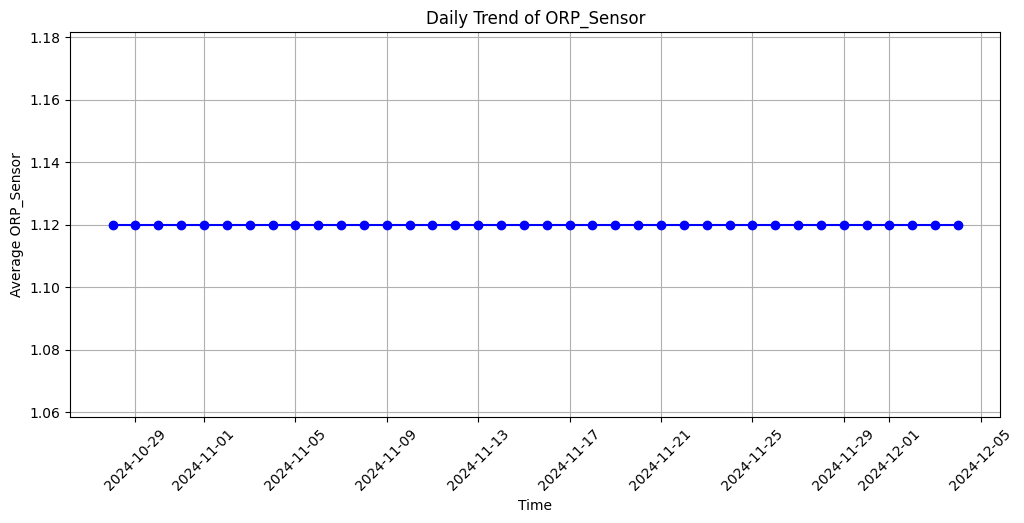

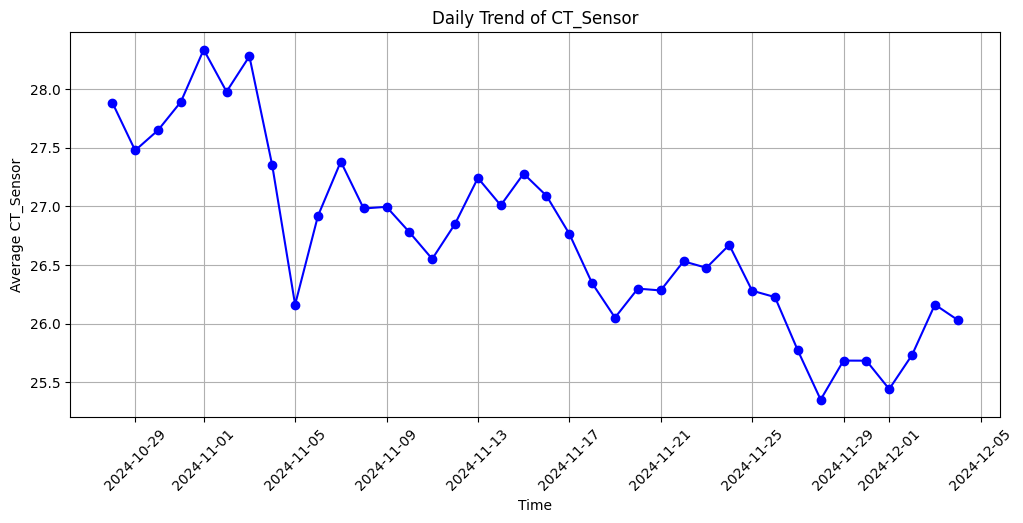

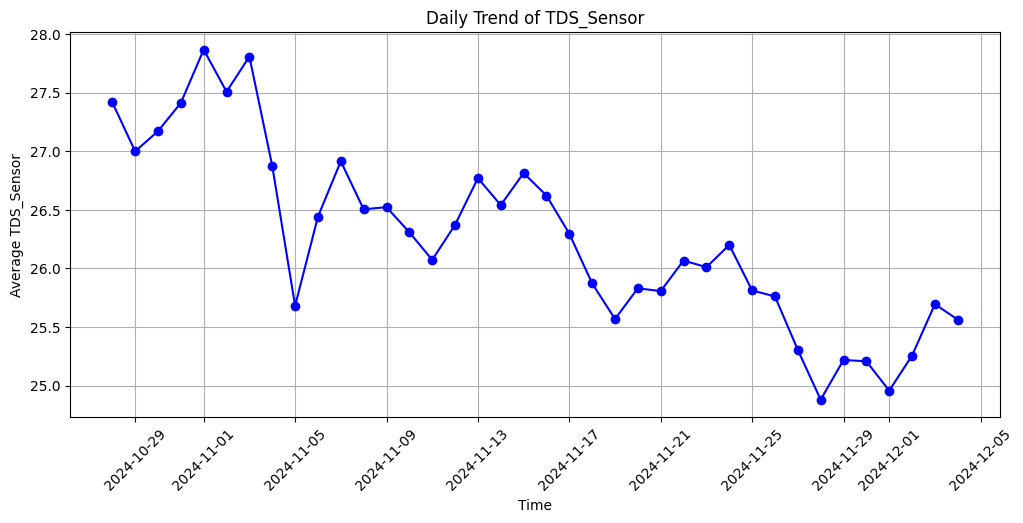

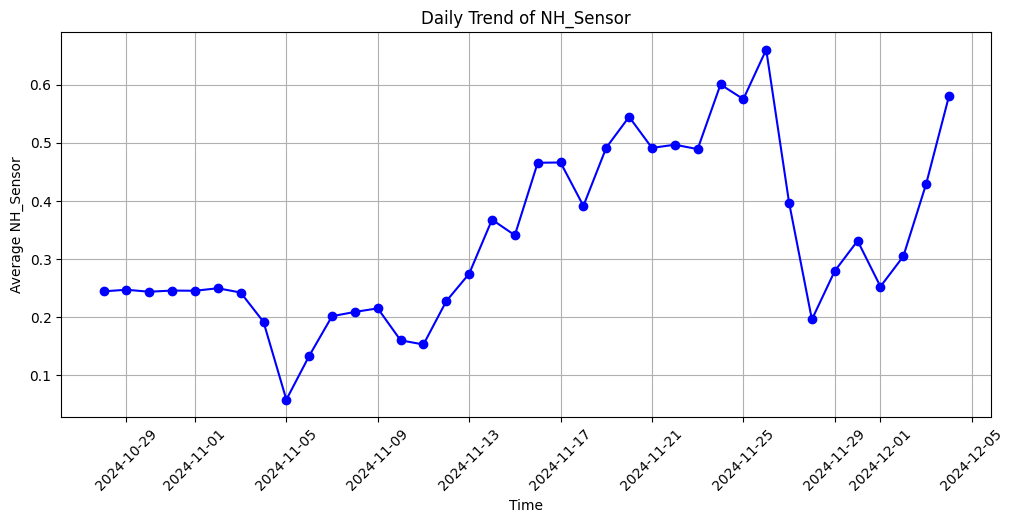

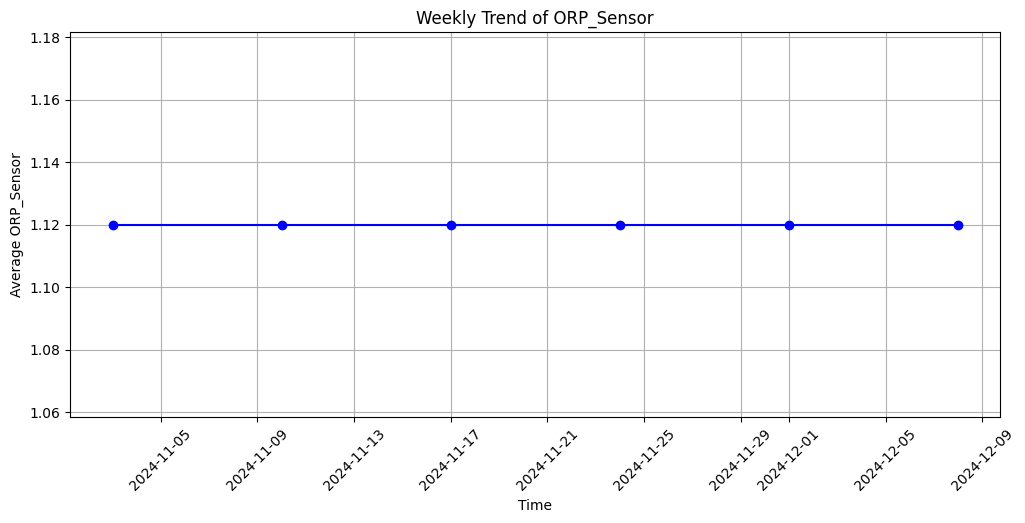

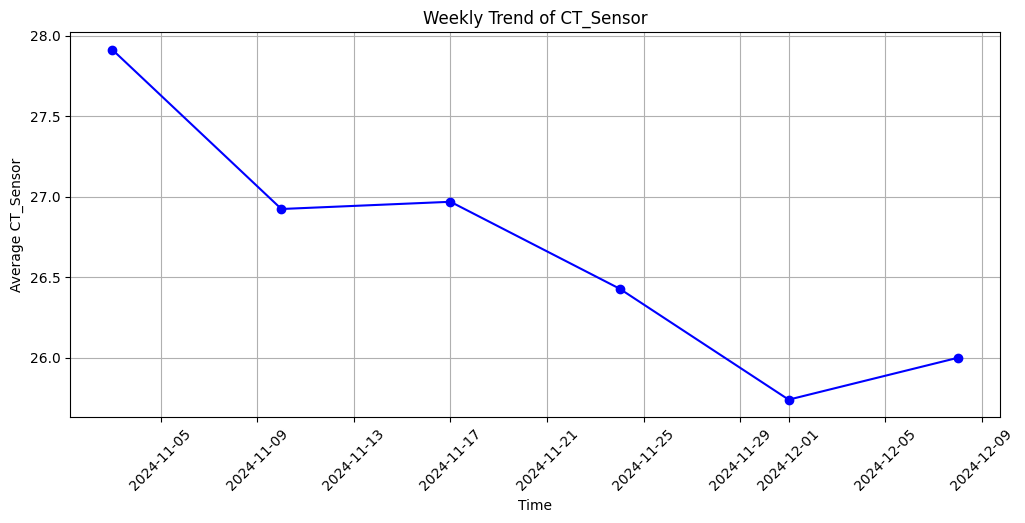

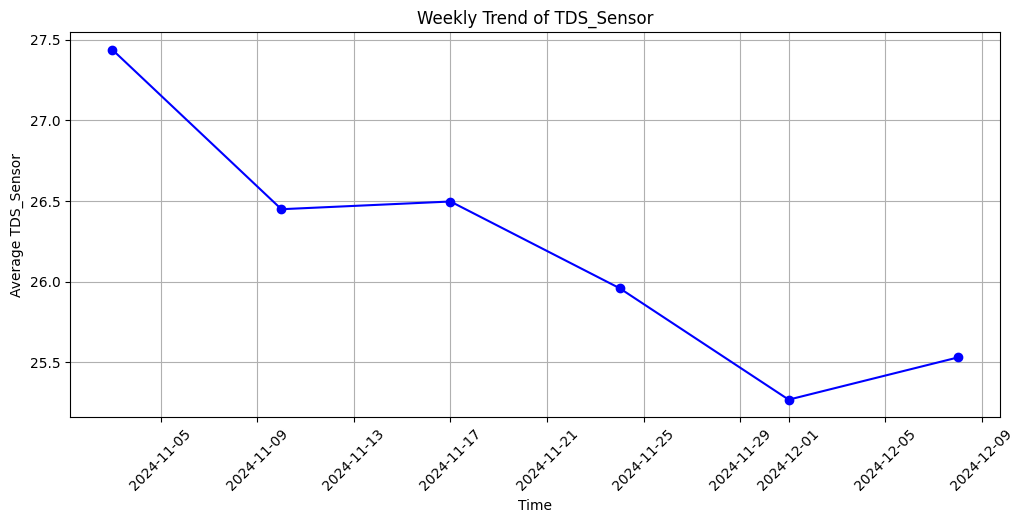

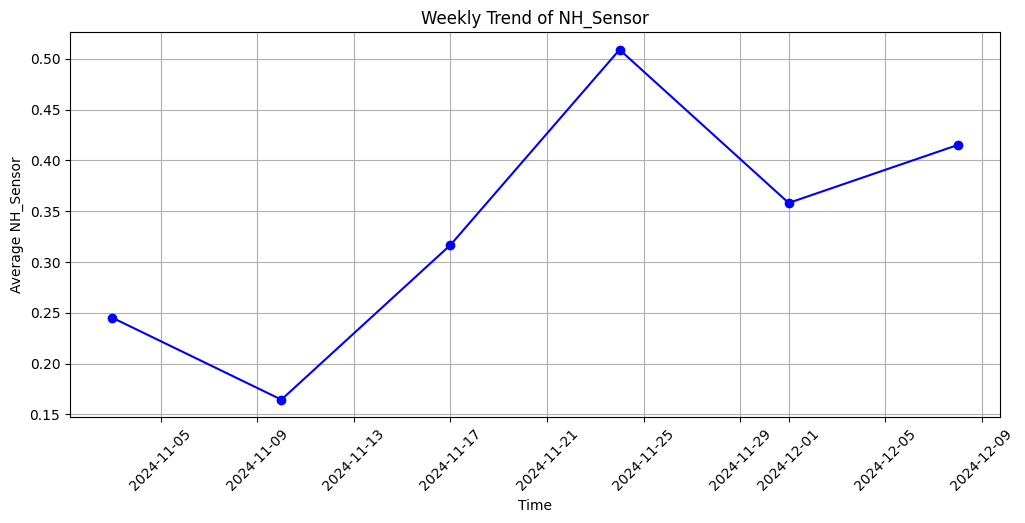

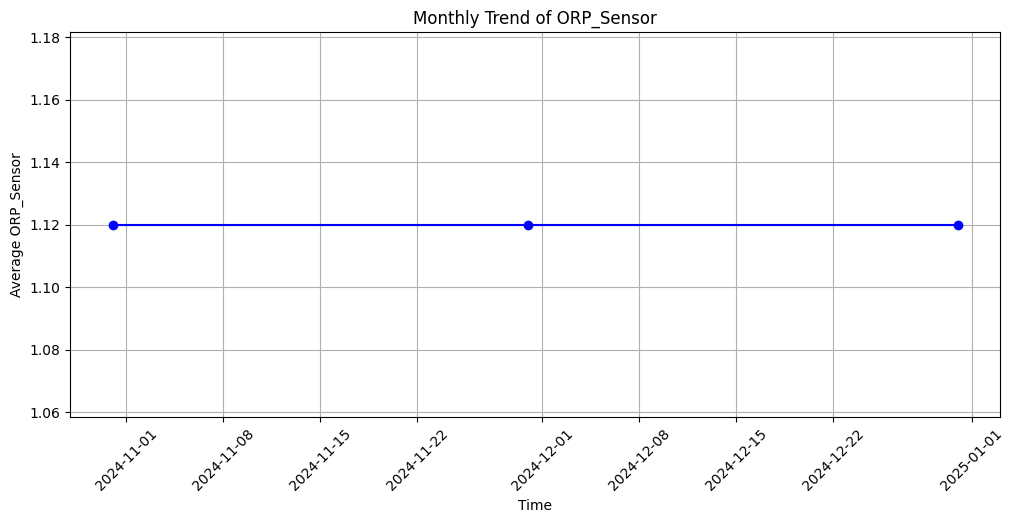

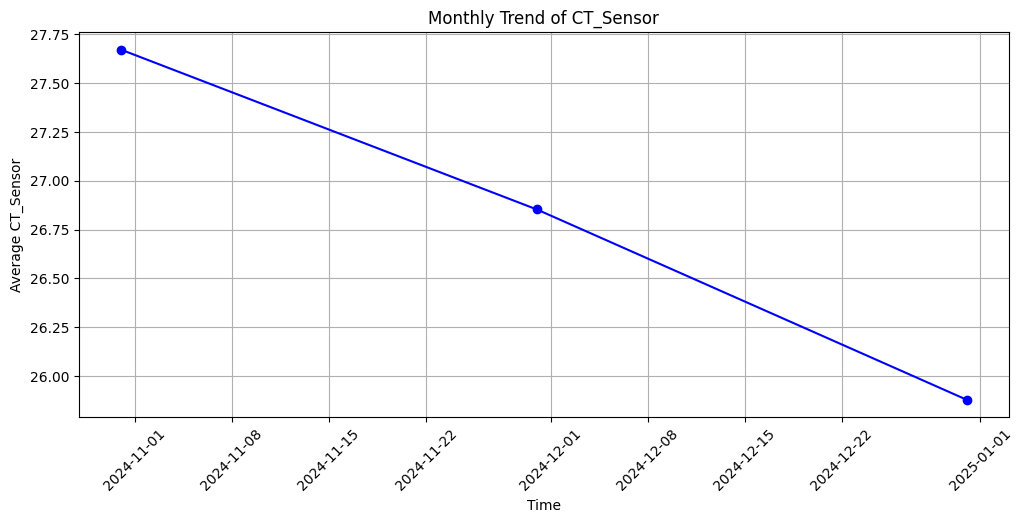

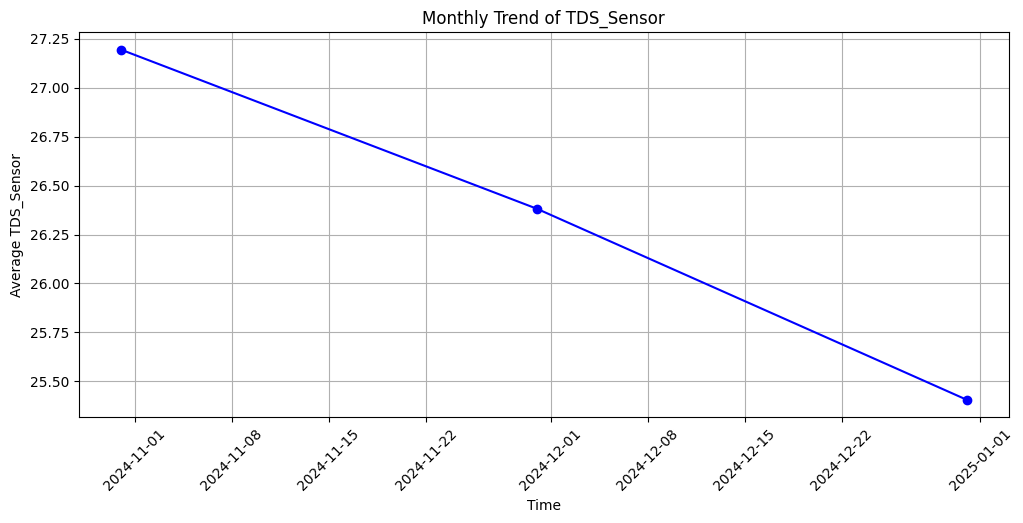

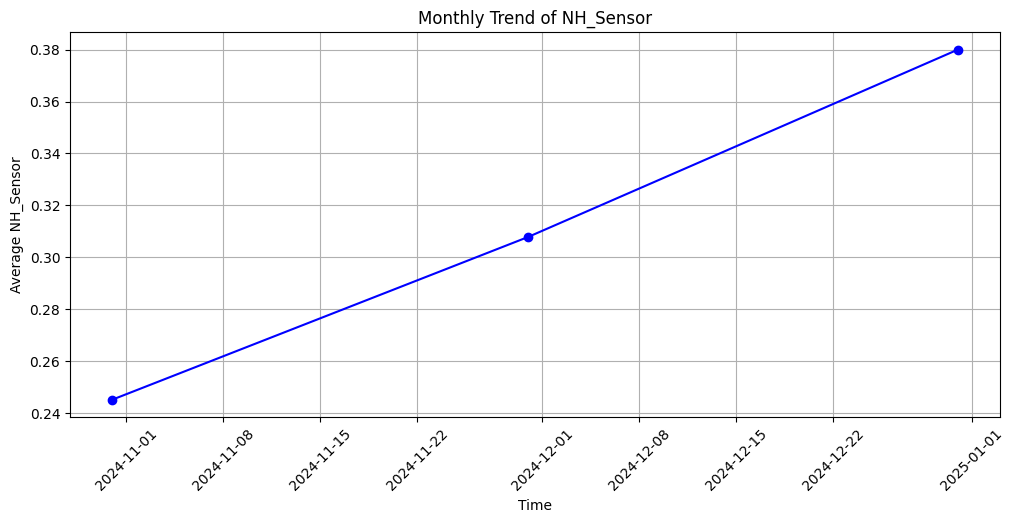

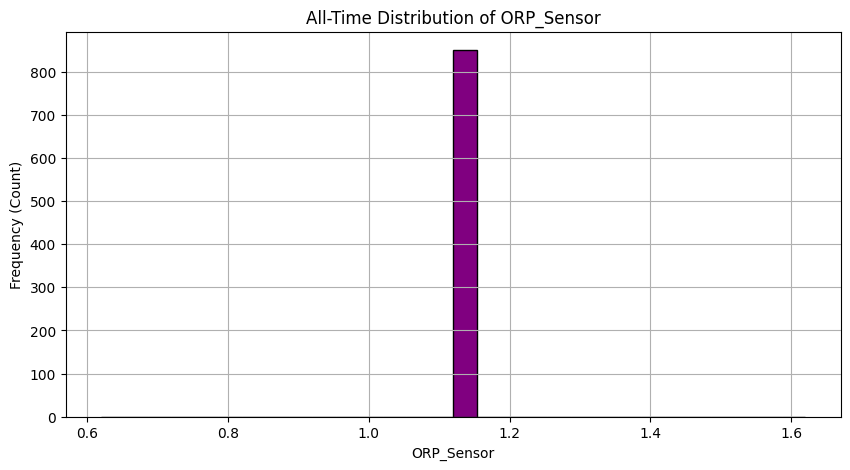

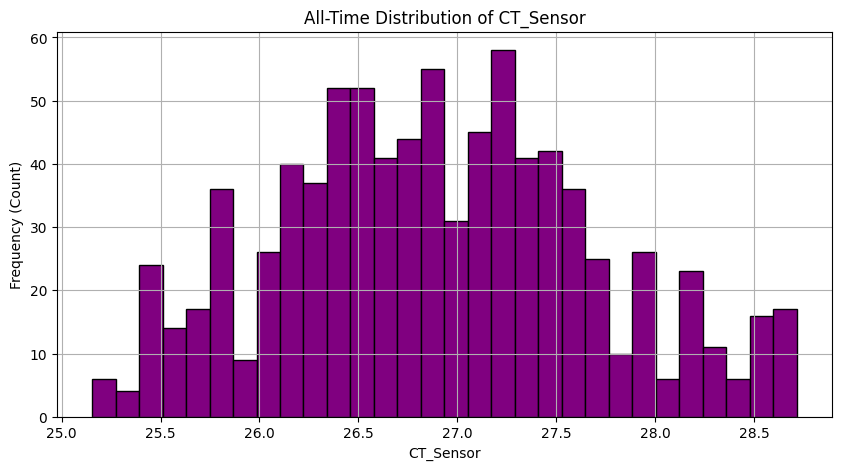

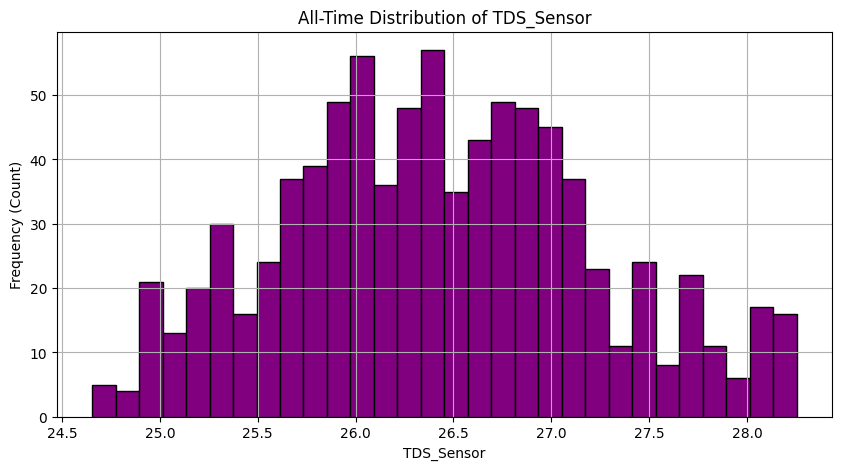

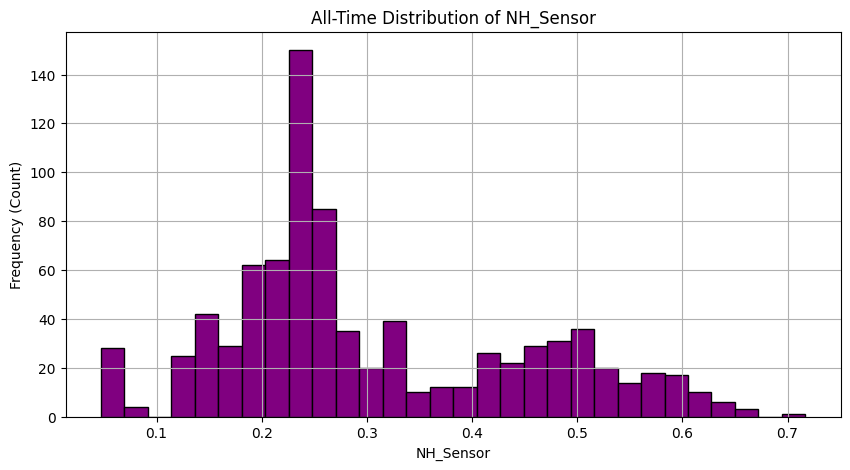

In [12]:
# Path file CSV yang sudah dibersihkan
file_path = "Kechau_Cleaned.csv"

# Baca file CSV
df_cleaned = pd.read_csv(file_path)

# Pastikan kolom "Timestamp" ada dan dalam format datetime
df_cleaned["Timestamp"] = pd.to_datetime(df_cleaned["Timestamp"], errors='coerce')

# Set sebagai index untuk resampling
df_cleaned.set_index("Timestamp", inplace=True)

# Buat pengelompokan daily, weekly, monthly berdasarkan rata-rata
df_daily = df_cleaned.resample('D').mean()
df_weekly = df_cleaned.resample('W').mean()
df_monthly = df_cleaned.resample('M').mean()

# Fungsi untuk menampilkan trend berdasarkan waktu
def plot_time_series(grouped_df, title):
    for column in df_cleaned.columns:
        plt.figure(figsize=(12, 5))
        plt.plot(grouped_df.index, grouped_df[column], marker='o', linestyle='-', color='b')
        plt.xlabel("Time")
        plt.ylabel(f"Average {column}")
        plt.title(f"{title} Trend of {column}")
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

# Plot time series untuk daily
plot_time_series(df_daily, "Daily")

# Plot time series untuk weekly
plot_time_series(df_weekly, "Weekly")

# Plot time series untuk monthly
plot_time_series(df_monthly, "Monthly")

# Plot histogram untuk distribusi all-time
for column in df_cleaned.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df_cleaned[column].dropna(), bins=30, edgecolor='black', color='purple')
    plt.xlabel(column)
    plt.ylabel("Frequency (Count)")
    plt.title(f"All-Time Distribution of {column}")
    plt.grid()
    plt.show()


In [ ]:
df_cleaned.count()